# **Python Data Analysis: Movies**
**Name:** Greg Indick


### **Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
from pprint import pprint
from datetime import date

### **Import IMDb Data**
The data from IMDb includes CSV files of movies rated on its website. There are 4 primary files: movie titles, crews of the movies (like director), names of the crews, and ratings of the movies. 

**Load in data via mounting colab to Google Drive**

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titles_datapath = '/content/drive/MyDrive/'
crew_datapath = '/content/drive/MyDrive/'
crew_names_datapath = '/content/drive/MyDrive/'
ratings_datapath = '/content/drive/MyDrive/'

movie_titles = pd.read_csv(titles_datapath, sep='\t', header=0, on_bad_lines='skip', low_memory=False)
movie_crew = pd.read_csv(crew_datapath, sep='\t', header=0)
movie_crew_names = pd.read_csv(crew_names_datapath, sep='\t', header=0)
movie_ratings = pd.read_csv(ratings_datapath, sep='\t', header=0)

**Load in data by uploading to GDrive.**

In [2]:
movie_titles = pd.read_csv('title.basics.tsv', sep='\t', header=0, on_bad_lines='skip', low_memory=False)
movie_crew = pd.read_csv('title.crew.tsv', sep='\t', header=0)
movie_crew_names = pd.read_csv('name.basics.tsv', sep='\t', header=0)
movie_ratings = pd.read_csv('title.ratings.tsv', sep='\t', header=0)

### **Glimpse dataframes**

In [6]:
movie_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
movie_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [8]:
movie_crew_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0045537,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0060827,tt0083922,tt0050986"


In [9]:
movie_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1966
1,tt0000002,5.8,263
2,tt0000003,6.5,1808
3,tt0000004,5.6,178
4,tt0000005,6.2,2607


### **Join Datasets**
Join movies with its ratings, crew, and crew names.

In [3]:
title_and_ratings = pd.merge(movie_titles, movie_ratings)

In [4]:
title_ratings_crew = pd.merge(title_and_ratings, movie_crew)

In [5]:
title_ratings_crew_names = pd.merge(title_ratings_crew, movie_crew_names, 
                                    left_on='directors', right_on='nconst')

### **Clean Data**

Filter out short films

In [6]:
movies = title_ratings_crew_names[title_ratings_crew_names.titleType == "movie"]

Filter out adult movies

In [7]:
movies = movies[movies.isAdult != 1]

Drop movies that have the same movie title

In [8]:
movies = movies.drop_duplicates(subset='tconst',keep='first') #got rid of instances where movies had the same title because I thought it may cause some confusion during analysis, and we have enough data points to drop some

Only include movies that have a start year and change datatype to 'int.'

In [9]:
movies = movies[movies.startYear != '\\N']
movies = movies[movies.genres != '\\N']
movies = movies[movies.runtimeMinutes != '\\N']

In [10]:
movies['startYear'] = movies['startYear'].astype(int)
movies['runtimeMinutes'] = movies['runtimeMinutes'].astype(int)

Each movie only has the first primary genre specified (exclude adult genres).

In [11]:
movies['genres'] = movies['genres'].str.split(',').str[0]
movies = movies[movies.genres != 'Adult']

Get rid of the 'isAdult' and 'endYear' columns. Rename the 'startYear' column to 'year.'

In [12]:
movies = movies.drop(['isAdult', 'endYear'], axis=1)
movies = movies.rename(columns = {'startYear':'year'})

In [20]:
movies.shape

(228034, 17)

### **Compare the Average Rating of Movies by Decade, Dating Back to the 1970s**

Only include the top 10 most common genres that appear in the database.

In [21]:
decade_comparison = movies
decade_comparison.groupby('genres', as_index=False)['tconst'].count().sort_values(by='tconst', ascending=False)

,genres,tconst
7,Drama,69446
4,Comedy,52306
6,Documentary,27841
0,Action,24431
5,Crime,12203
1,Adventure,9508
13,Horror,9341
3,Biography,6856
24,Thriller,3499
19,Romance,2184


In [22]:
decade_comparison = decade_comparison.query("genres in ('Drama', 'Documentary', 'Comedy', 'Action', 'Horror', 'Biography', 'Crime', 'Adventure', 'Thriller', 'Animation')")

Include movies from 1970-2020. Then, classify each movie by the decade it was made in.

In [23]:
decade_comparison = decade_comparison[(decade_comparison['year']>1969) & (decade_comparison['year']<2020)]

In [24]:
def decade_classification(year):
  if year >= 1970 and year < 1980:
    return '1970s'
  elif year >= 1980 and year < 1990:
    return '1980s'
  elif year >= 1990 and year < 2000:
    return '1990s'
  elif year >= 2000 and year < 2010:
    return '2000s'
  else:
    return '2010s'

In [25]:
decade_comparison['decade'] = decade_comparison['year'].apply(decade_classification)

In [26]:
bar_decade = decade_comparison.groupby('decade', as_index=False)['averageRating'].mean()

In general, each decade experiences a similar average rating for the most commonly rated genres. In the 2000s, the most commonly rated genres that we have been analyzing had an average rating of nearly 6.2 while the late 1900s had average ratings of just over 6.0. There's not a significant difference here.

In [27]:
px.bar(bar_decade, x='decade', y='averageRating', 
       title="Average IMDb Rating of Movies by Decade",
       labels={"decade": "Decade",
               "averageRating": "Average IMDb Rating",
                 })

In [28]:
decade_comparison.groupby(['genres'], as_index=False)['tconst'].count().sort_values(by='tconst', ascending=False)

# Drama
# Comedy
# Documetary
# Action
# Horror

,genres,tconst
7,Drama,48057
4,Comedy,36142
6,Documentary,23093
0,Action,19203
5,Crime,7601
8,Horror,7465
1,Adventure,5895
3,Biography,5552
9,Thriller,2652
2,Animation,1455


In [29]:
genre_decade_comparison = decade_comparison.query("genres in ('Drama', 'Documentary', 'Comedy', 'Horror', 'Action')")

In [30]:
bar_decade_genre = decade_comparison.groupby(['decade', 'genres'], as_index=False)['averageRating'].mean()

After taking the top 5 most commonly rated genres between 1970-2019, we see that Documentaries have the highest average rating across the board. Action movies appeared to be more popular in the 1970s with an average rating of nearly 6.0 before declining over the next few decades. This is also similar to Horror films.

In [31]:
px.bar(bar_decade_genre, x='genres', y='averageRating', color='decade',
       barmode="group", title="Average IMDb Rating of Most Commonly Rated Genres by Decade",
       labels={"decade":"Decade",
               "averageRating":"Average IMDb Rating",
               "genres":"Movie Genres"})

In [32]:
run_time_comp = decade_comparison.groupby('decade', as_index=False)['runtimeMinutes'].mean()

The bar chart below looks at the average run time of the 10 most common movie genres from the 1970s to the 2010s. Overall, we do not see that drastic of difference in average run time over the decades. The 1980s and 1990s saw a peak of films nearly reaching an average run time of 100 minutes before decreasing in the 2000s. 

In [33]:
px.bar(run_time_comp, x='decade', y='runtimeMinutes', 
       title="Average Run Time of Movies by Decade",
       labels={"decade": "Decade",
               "runtimeMinutes": "Average Run Time (Minutes)",
                 })

In [34]:
genres_run_time = decade_comparison.groupby(['decade', 'genres'], as_index=False)['runtimeMinutes'].mean()

This side-by-side bar chart looks at the average run time of the five most common genres from the 1970s to the 2010s. From the 1970s to the 2010s, the average run time of Action movies increased over 100 minutes, which is similar to Comedy movies that also rose a bit in a run time. 

Documentaries saw the most drastic decrease in run time over the 5 decades, going from nearly 95 minutes on average in the 1980s to about 80 minutes in the 2010s. Horror films also saw a decrease in average run time from the 90 minute range to the 80 minute range.

Dramas hovered around the same run time over the 5 decades.

In [35]:
px.bar(genres_run_time, x='genres', y='runtimeMinutes', color='decade',
       barmode="group", title="Average Run Time of Most Commonly Rated Genres by Decade",
       labels={"decade":"Decade",
               "runtimeMinutes":"Average Run Time (Minutes)",
               "genres":"Movie Genres"})

### **Analyze basic distribution and voting patterns of the top 10 most common genres in the early 2000s decade**

Only include movie genres from the decade in which this project will be based upon (2000-2009).

In [13]:
two_decade = movies.loc[(movies['year']>1999) & (movies['year']<2010)]

Determine the top 10 most common genres in the dataframe.

In [37]:
two_decade.groupby('genres', as_index=False)['tconst'].count().sort_values(by='tconst', ascending=False)

# Drama
# Comedy
# Documentary
# Action
# Crime
# Horror
# Adventure
# Biography
# Thriller
# Romance

,genres,tconst
7,Drama,11088
4,Comedy,8539
6,Documentary,6307
0,Action,3727
5,Crime,1611
11,Horror,1581
1,Adventure,940
3,Biography,897
18,Thriller,608
15,Romance,366


In [38]:
top_10 = two_decade.query("genres in ('Drama', 'Comedy', 'Documentary', 'Action', 'Crime', 'Horror', 'Adventure', 'Biography', 'Thriller', 'Romance')")

Visualize the number of movies in the IMDb database by genre between 2000 and 2009.

In [39]:
genre_count = top_10.groupby(['year', 'genres'], as_index=False)['tconst'].count()

In the early 2000s, Drama, Action, Documentary, and Action movie genres were the most prevalent genres in this decade. Dramas increased by nearly 100% while Documentaries increased by 327%. 

In [40]:
line_count = px.line(genre_count, x='year', y='tconst', color='genres', 
                     title='Count of Most Commonly Rated Genres (2000-2009)',
                     labels={
                     "year": "Movie Release Year",
                     "tconst": "Count of Movie Genre",
                     "genres": "Movie Genres"
                 })

line_count.update_traces(line={'width':3})

Visualize the total number of votes each movie genre receives between 2000 and 2009.

In [41]:
genre_vote = top_10.groupby(['year', 'genres'], as_index=False)['numVotes'].sum()

Action and Comedy movie genres were the most voted upon genres in the early 2000s decade. From 2006 to 2008, Action movies received 6,000,000 more votes. 

In [42]:
line_votes = px.line(genre_vote, x='year', y='numVotes', color='genres', 
                     title='Total Votes of Most Commonly Rated Genres (2000-2009)',
                     labels={
                     "year": "Movie Release Year",
                     "numVotes": "Sum of the Number of Votes",
                     "genres": "Movie Genres"
                 })

line_votes.update_traces(line={'width':3})

Visualize the distribution of IMDb ratings of the top 10 most commonly found genres between 2000 and 2009.

In this histogram, we see that most movies are rated between a 6.0 and 7.0. The distribution is left-skewed, indicating that audiences rarely rate movies extremely poor or low. 

In [43]:
px.histogram(top_10, x="averageRating",
             title="Distribution of Average IMDb Rating Among Most Commonly Rated Genres in the Early 2000s",
             labels={
                 "count":"Count",
                 "averageRating":"Average IMDb Rating"
             })

The box plot provides a glimpse of the distribution of the top 10 most common movie genre average IMDb ratings from the early 2000s decade.

Documentary, Biography, and Drama films have the highest median ratings on IMDb. Despite this success, these genres appear to have the most amount of average ratings towards the lower extremities. This indicates that although there are several films among these genres that were of low quality, there were a handful that were extremely successful. 

Additionally, Thriller, Action, and Adventure films have the highest variability, indicating that films within the genre had varying degrees of success and popularity among users. 

In [44]:
box_plot = px.box(top_10, y='averageRating', x='genres',
                  title='Distribution of IMDb Ratings by Genre (2000-2009)',
                  labels={
                      'averageRating':'Average IMDb Rating',
                      'genres':'Movie Genres'
                  })

box_plot.update_layout(yaxis_range=[0,10.0])

### **Analyze indicators of movie success of the top 5 most commonly voted upon genres in the early 2000s.**

For more in-depth analysis, determine the top 5 most commonly voted upon genres between 2000 and 2009.

In [45]:
two_decade.groupby('genres', as_index=False)['numVotes'].sum().sort_values(by='numVotes', ascending=False)

# Action
# Comedy
# Drama
# Adventure
# Crime

,genres,numVotes
0,Action,97723162
4,Comedy,56235409
7,Drama,44421895
1,Adventure,21657258
5,Crime,20985621
3,Biography,14244493
11,Horror,9838553
14,Mystery,2187961
6,Documentary,1717589
2,Animation,1201534


In [46]:
first_five = two_decade.query("genres in ('Action', 'Comedy', 'Drama', 'Adventure', 'Crime')")

Determine the highest average rating of the top most voted upon genres in the early 2000s. 

Drama movies had the highest average IMDb rating at just over 6, while the other 4 hovered between 5 and 6.

In [47]:
five_rating_genre = first_five.groupby('genres',as_index=False)['averageRating'].mean()

px.bar(five_rating_genre, x='genres', y='averageRating',
       title='Average IMDb Rating of the Most Rated Movie Genres',
       labels={
           'averageRating':'Average IMDb Rating',
           'genres':'Movie Genre'
       })

Examine the relationship between average rating and movie run time in minutes in the early 2000s among the top 5 most rated genres.

There appears to be a slight positive relationship between Average IMDb Rating and Run Time. However, it doesn't appear significant enough to make a solidified statement. This scatterplot shows that run times as a whole tend to run in the 100 minute range.  

In [48]:
scatter_plot = px.scatter(first_five, x="runtimeMinutes", y="averageRating", trendline='ols',
                          title='Relationship between Run Time and Average IMDb Rating',
                          labels={
                              'averageRating':'Average IMDb Rating',
                              'runtimeMinutes':'Movie Run Time (Minutes)'
                          })

scatter_plot.update_layout(xaxis_range=[0,250])

Separate run time into bins

In [49]:
bins = [0, 50, 75, 100, 125, 150, 200]
first_five['timeBins'] = pd.cut(first_five['runtimeMinutes'], bins)

<ipython-input-49-bbca205d8159>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Drop any movies that have null values - AKA, movies that exceed a run time of 200 minutes (~ 3.33 hours)

In [50]:
first_five = first_five.dropna(subset='timeBins')

The line plot looks at the number of films from the top 5 most rated genres by their run time in bins. Most film run times were between 75 and 125 minutes. Films with run times in the bottom and top extremeties were rare during this decade.

In [51]:
count_run_time = first_five.groupby(['year','timeBins'], as_index=False)['tconst'].count()

In [52]:
line_count_time = px.line(count_run_time, x='year', y='tconst', color='timeBins', 
                     title='Count of Movie Run Times (2000 - 2009)',
                      labels={
                     "year": "Movie Release Year",
                     "tconst": "Count of Movie Run Time Ranges",
                     "timeBins": "Run Time of Movies in Minutes"
                 })

line_count_time.update_traces(line={'width':3})

After determining the counts of the films within each time bin, the bins of 0-50 and 150-200 were excluded from the analysis because there were so few observations. This ensures that the results, particularly those examining average rating, are not skewed. 

In [53]:
first_five['timeBins'] = first_five['timeBins'].astype('str')
movie_time_analysis = first_five[first_five['timeBins'] != '(0, 50]']

In [54]:
movie_time_analysis = movie_time_analysis[movie_time_analysis['timeBins'] != '(150, 200]']

In [55]:
movie_time_analysis_chart = movie_time_analysis.groupby(['year', 'timeBins'], as_index=False)['averageRating'].median()

The plot below visualizes the average IMDb rating of films within each time bin. Despite having the highest average rating in 2001, most films between the run time range of 50 minutes to 150 minutes had similar average ratings of about 6.4. However, films that had a run time between 75 and 100 minutes experienced an average rating that was about 0.4 points lower than the rest. Viewers appear to enjoy either end of the spectrum in terms of watching films. They may either want a film that is quick and to the point, or a film that approaches the 2 hour mark. 

In [56]:
line_movie_time = px.line(movie_time_analysis_chart, x='year', y='averageRating', color='timeBins', 
                     title='Average IMDb Movie Ratings by Run Time (2000-2009)',
                      labels={
                     "year": "Movie Release Year",
                     "averageRating": "Average IMDb Rating",
                     "timeBins": "Run Time (Min)"
                 },
                 category_orders={
                     "timeBins":['(50, 75]', 
                                       '(75, 100]',
                                       '(100, 125]',
                                 '(125, 150]']
                 })

line_movie_time.update_traces(line={'width':3})

Overall, it can be noticed that the average rating of these genres slightly increases as the run time increases, particularly in the range of 75 to 150 minutes. This is particularly true of Adventure films that have over a 6.5 average rating between the 125 to 150 minute mark. Dramas appear to be consistently the highest rated genre until a film passes the 2 hour mark, in which Adventure and Crime films become more popular. Comedies, for the most part, remain stable over the course of various run times. This analysis indicates that users tend to enjoy the fast-paced, thrilling plots of Adventure and Crime films as they get longer in time. 

In [57]:
five_genre_rating_timebin = movie_time_analysis.groupby(['genres', 'timeBins'], as_index=False)['averageRating'].mean()

px.bar(five_genre_rating_timebin, x='timeBins', y='averageRating', color='genres',
       barmode='group', title='Average IMDb Rating for Movie Genres by Run Time',
       labels={
           'averageRating':'Average IMDb Rating',
           'timeBins':'Movie Run Time (Minutes)',
           'genres':'Movie Genres'
       }, 
       category_orders={
                     "timeBins":['(50, 75]', 
                                       '(75, 100]',
                                       '(100, 125]',
                                       '(125, 150]']
                 })

Drop any observations with null values in the 'primaryProfession' column.

In [58]:
first_five = first_five.dropna(subset='primaryProfession')

Only include observations containing film directors.

In [59]:
first_five = first_five[first_five['primaryProfession'].str.contains('director')]

Determine the count of films each director made during the decade. Only include directors that made more than 1 film during the decade. 

In [60]:
director_count = first_five.groupby('primaryName', as_index=False)['tconst'].count().sort_values(by='tconst', ascending=False)

In [61]:
director_count = director_count[director_count['tconst']>1]
director_rating_df = pd.merge(first_five, director_count, how='left', on='primaryName')
director_rating_df = director_rating_df.dropna(subset='tconst_y')

In [62]:
director_ratings_list = director_rating_df.groupby('primaryName', as_index=False)['averageRating'].mean().sort_values(by='averageRating', ascending=False)

All of the ten most successful directors of the early 2000s decade had an average rating of  8.45 or higher. This indicates that an IMDb score of 8.0 or higher is more than satisfactory. The more interesting aspect of this table is the fact that 50% of the directors are foreign filmmakers, spanning India to Eastern Europe.

In [63]:
best_directors = director_ratings_list.head(10)
best_directors

,primaryName,averageRating
2030,Josh Monkarsh,8.95
2869,Munin Barua,8.95
942,Dinesh Chaudhary,8.80
3901,Steve Kopera,8.80
1189,Filip Jan Rymsza,8.70
4469,Zulfikar Musakov,8.65
788,Daniel Kremer,8.55
711,Cookie 'Chainsaw' Randolph,8.55
1303,George Voulgaris,8.50
3993,Tamar Halpern,8.45


When compared to the directors with films receiving the most number of votes during this decade, all directors on this list made films in English speaking film markets (i.e. USA and UK). This comparison shows that most users and raters on IMDb are located within English speaking film markets or tend to watch and review films from these markets.

In [64]:
director_votes_list = director_rating_df.groupby('primaryName', as_index=False)['numVotes'].sum().sort_values(by='numVotes', ascending=False)
director_votes_list.head(10)

,primaryName,numVotes
667,Christopher Nolan,5861103
3166,Peter Jackson,4209559
3412,Ridley Scott,2975658
1366,Gore Verbinski,2738480
695,Clint Eastwood,2535265
3907,Steven Spielberg,2501250
3619,Sam Raimi,2179125
2704,Michael Bay,1979878
1423,Guy Ritchie,1890766
2613,Martin Scorsese,1802356


Only include directors who have films with more than 363 votes (top 50%).

In [65]:
director_rating_df['numVotes'].describe()

count    1.290600e+04
mean     1.440813e+04
std      7.494476e+04
min      5.000000e+00
25%      8.700000e+01
50%      3.635000e+02
75%      1.863000e+03
max      2.704519e+06
Name: numVotes, dtype: float64

In [66]:
votes_director_df = director_rating_df[director_rating_df['numVotes']>=364]

In [67]:
genre_director_rating = votes_director_df.groupby(['genres','primaryName'], as_index=False)['averageRating'].mean().sort_values(by=['genres','averageRating'], ascending=False)

From these outputs, it can be seen that Action films had the highest average rated director in Christopher Nolan. However, Drama and Comedy films appeared to have directors with the most consistent average ratings, ranging between 8.2 and 8.4. Crime films were the only genre with directors that had average ratings at or below 8.0, indicating that this genre tended to not yield as high of ratings. 

The most significant takeaway is the nationalities of these directors. As seen above, famous ‘Hollywood’ directors of Christopher Nolan, Peter Jackson, Sean Penn, Edward Zwick, Martin Scorsese, and Clint Eastwood are represented. The rest of the names listed are famous directors of other nationalities in foreign film markets. Despite most IMDb users and raters tending to rate films directed in English speaking markets, it appears that users also have an affinity for foreign films and markets like Bollywood. In addition, all directors mentioned in this analysis are males except for Tamar Halpern mentioned in the original top ten directors list.

In [68]:
comedy_directors = genre_director_rating.query("genres in ('Comedy')")
comedy_directors.head()

,genres,primaryName,averageRating
1614,Comedy,Jean-Pierre Jeunet,8.30
2373,Comedy,Vijay K. Bhaskar,8.30
2409,Comedy,Yograj Bhat,8.30
1953,Comedy,Nae Caranfil,8.25
1192,Comedy,Bommarillu Baskar,8.20


In [69]:
action_directors = genre_director_rating.query("genres in ('Action')")
action_directors.head()

,genres,primaryName,averageRating
112,Action,Christopher Nolan,8.600000
379,Action,K. Selvaraghavan,8.500000
554,Action,Peter Jackson,8.266667
497,Action,Mysskin,8.100000
537,Action,Park Chan-wook,8.050000


In [70]:
drama_directors = genre_director_rating.query("genres in ('Drama')")
drama_directors.head()

,genres,primaryName,averageRating
3870,Drama,Rajeev Patil,8.4
3015,Drama,Blessy,8.3
3699,Drama,Michel Gondry,8.3
3788,Drama,P. Vasu,8.3
4086,Drama,Tauquir Ahmed,8.3


In [71]:
adventure_directors = genre_director_rating.query("genres in ('Adventure')")
adventure_directors.head()

,genres,primaryName,averageRating
1014,Adventure,Sundar C.,8.500000
891,Adventure,Hayao Miyazaki,8.133333
999,Adventure,Sean Penn,8.100000
866,Adventure,Edward Zwick,8.000000
920,Adventure,Kevin Macdonald,8.000000


In [72]:
crime_directors = genre_director_rating.query("genres in ('Crime')")
crime_directors.head()

,genres,primaryName,averageRating
2612,Crime,Jean-Xavier de Lestrade,8.00
2693,Crime,Martin Scorsese,8.00
2672,Crime,Lars von Trier,7.95
2488,Crime,Bong Joon Ho,7.95
2511,Crime,Clint Eastwood,7.90


# **MOVIE DB**

In [73]:
two_thousands_decade = two_decade.loc[(two_decade['genres']=='Action')| (two_decade['genres']=='Comedy')|(two_decade['genres']=='Drama')|(two_decade['genres']=='Adventure')|(two_decade['genres']=='Crime')]
two_thousands_decade.head()

,tconst,titleType,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
14250,tt0314085,movie,Francisca,Francisca,2002,88,Drama,5.9,118,nm0529960,"nm0325529,nm0529960,nm0759270,nm1602536",nm0529960,Eva López Sánchez,1954,\N,"director,writer,editor","tt1139666,tt0314085,tt0015724,tt0151790"
14251,tt1139666,movie,One for the Road,La última y nos vamos,2009,90,Drama,6.2,246,nm0529960,"nm0529960,nm0585767",nm0529960,Eva López Sánchez,1954,\N,"director,writer,editor","tt1139666,tt0314085,tt0015724,tt0151790"
21030,tt0283422,movie,I'm Going Home,Je rentre à la maison,2001,90,Comedy,6.9,1818,nm0210701,"nm0210701,nm0409560,nm0663729,nm0000636,nm0004656",nm0210701,Manoel de Oliveira,1908,2015,"director,writer,editor","tt0094833,tt0283422,tt0980976,tt2006802"
21032,tt0303162,movie,The Uncertainty Principle,O Princípio da Incerteza,2002,133,Drama,6.7,413,nm0210701,"nm0078760,nm0210701,nm0663729,nm0119664,nm3841339",nm0210701,Manoel de Oliveira,1908,2015,"director,writer,editor","tt0094833,tt0283422,tt0980976,tt2006802"
21033,tt0364093,movie,A Talking Picture,Um Filme Falado,2003,96,Comedy,6.6,2056,nm0210701,nm0210701,nm0210701,Manoel de Oliveira,1908,2015,"director,writer,editor","tt0094833,tt0283422,tt0980976,tt2006802"


In [74]:
two_thousands_decade.shape

(25905, 17)

In [75]:
sample_df = two_thousands_decade.groupby('genres').apply(lambda x: x.sample(n=100, random_state=42))
sample_df

tconst titleType           primaryTitle  \
genres                                                      
Action 500819  tt0438299     movie               Overkill   
       385148  tt0255019     movie                Blister   
       602698  tt0913401     movie  Kill Buljo: The Movie   
       205216  tt1043842     movie  Appleseed: Ex Machina   
       267295  tt0310029     movie          Pulsação Zero   
...                  ...       ...                    ...   
Drama  63602   tt1485742     movie        The Red Shadows   
       453478  tt0872025     movie        The Angel's Egg   
       124740  tt0308383     movie        The Human Stain   
       701739  tt1479335     movie  Plus là pour personne   
       489567  tt0420215     movie          The Spectator   

                           originalTitle  year  runtimeMinutes  genres  \
genres                                                                   
Action 500819                   Overkill  2004              88  Action   
       385148                   Burisuta  2000             108  Action   
       602698      Kill Buljo: The Movie  2007              93  Action   
       205216  Appurushido: Ekusu makina  2007             105  Action   
       267295              Pulsação Zero  2002              83  Action   
...                                  ...   ...             ...     ...   
Drama  63602              Le ombre rosse  2009              91   Drama   
       453478           Tenshi no tamago  2006             114   Drama   
       124740            The Human Stain  2003             106   Drama   
       701739      Plus là pour personne  2009              85   Drama   
       489567             La spettatrice  2004              98   Drama   

               averageRating  numVotes  directors  \
genres                                              
Action 500819            6.2        39  nm1802039   
       385148            6.5        80  nm0837354   
       602698            5.6      4072  nm2482088   
       205216            7.0      9725  nm0032925   
       267295            7.1       243  nm0289578   
...                      ...       ...        ...   
Drama  63602             5.3        86  nm0556255   
       453478            6.2       170  nm0865548   
       124740            6.2     31502  nm0000914   
       701739            3.9         9  nm1462823   
       489567            6.5       478  nm1671980   

                                                         writers     nconst  \
genres                                                                        
Action 500819                                          nm1802039  nm1802039   
       385148                                          nm0409353  nm0837354   
       602698                                nm2552337,nm2482088  nm2482088   
       205216                      nm0794385,nm1887932,nm1219582  nm0032925   
       267295                                          nm0289578  nm0289578   
...                                                          ...        ...   
Drama  63602                                           nm0556255  nm0556255   
       453478                                nm0613675,nm1397142  nm0865548   
       124740                                nm0744980,nm0583292  nm0000914   
       701739                                          nm1462823  nm1462823   
       489567  nm1671980,nm0772144,nm0733700,nm0149080,nm0723017  nm1671980   

                         primaryName birthYear deathYear  \
genres                                                     
Action 500819          Henric Brandt      1977        \N   
       385148            Taikan Suga        \N        \N   
       602698          Tommy Wirkola      1979        \N   
       205216         Shinji Aramaki      1960        \N   
       267295       Fernando Fragata        \N        \N   
...                              ...       ...       ...   
Drama  63602       Francesco Maselli      1930      2023   
   

In [76]:
title_2k = sample_df['primaryTitle'].tolist()

In [77]:
import requests
API_KEY = '8b54a8b845430886c348d82896a5f1a9'
BASE_URL = f'https://api.themoviedb.org/3'
ENDPOINT = '/search/movie'
movi=[]
for title_ in title_2k:
  url = f'{BASE_URL}{ENDPOINT}?api_key={API_KEY}&query={title_}'
  response = requests.get(url)
  
  data = response.json()

  results=data['results']
  for result in results:
    if result['title']==title_:
      movi.append(result)
df = pd.DataFrame(movi)

In [78]:
df=df.drop_duplicates(subset='title',keep='first')

In [79]:
table_merge = pd.merge(sample_df,df,left_on=['primaryTitle'],right_on=['title'],how='inner')

In [80]:
table_merge = table_merge[['title','averageRating','vote_average','genres']]
table_merge =table_merge.rename(columns={'title': 'Title', 'averageRating':'IMDB RATING','vote_average':'MOVIE DB RATING'})

In [81]:
table_merge=table_merge[table_merge['IMDB RATING']!=0]
table_merge=table_merge[table_merge['MOVIE DB RATING']!=0]

In [82]:
table_merge['Rating Difference'] = abs(table_merge['IMDB RATING'] - table_merge['MOVIE DB RATING'])

In [83]:
table_merge['Rating Difference'].mean()

1.012575

The IMDB and MOVIE DB ratings differ by about 1.0 on a scale of 1-10 across the 5 genres of interest during the years 2000-2009

Drama films appear to differ the most with an average mean rating difference of over 1.2. Comedy and Action films also differ significantly by a mean rating difference of 1.0 or more. 

Text(0, 0.5, 'Mean Rating Difference')

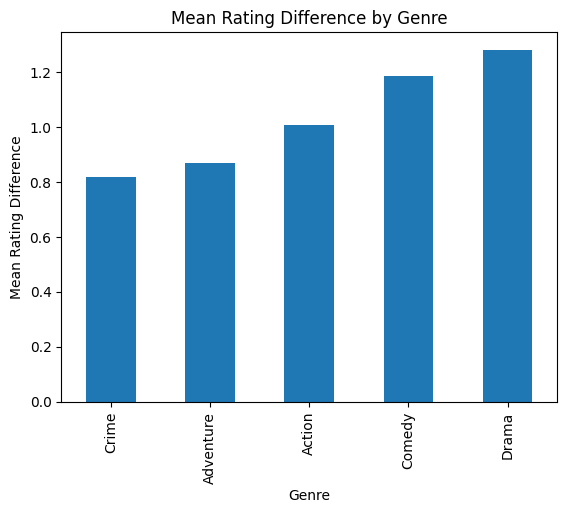

In [84]:
grouped_df = table_merge.groupby('genres')['Rating Difference'].mean().sort_values()
ax=grouped_df.plot(kind='bar')
ax.set_title('Mean Rating Difference by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Rating Difference')

Plot above conveys that the drama genre has the largest average difference in rating, while crime has the most agreement on rating. 

The plots below are used to visualize the distibution of scores by both sites across different genres

As seen below, Comedy films tend to be rated between 5 and 6 on IMDb, while being rated between 4 and 5 on TMDB. TMDB users tend to rate Comedy films in the lower extremity. 

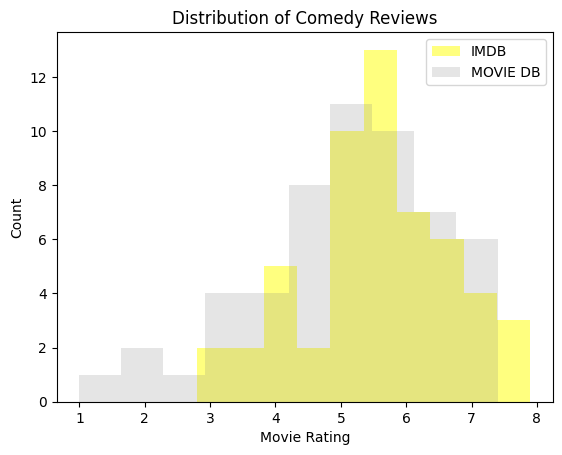

In [85]:
import matplotlib.pyplot as plt
comedy_t = table_merge[table_merge['genres']=='Comedy']
plt.hist(comedy_t['IMDB RATING'], alpha=.5, label='IMDB',color='yellow')
plt.hist(comedy_t['MOVIE DB RATING'],alpha=.2,label='MOVIE DB',color='grey')
plt.legend(loc='upper right')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Comedy Reviews')
plt.show()

IMDb users tend to rate Drama films above a 6, while TMDB users tend to rate them towards a 7. TMDB users are more likely to rate these films toward both the lower and upper extremities.

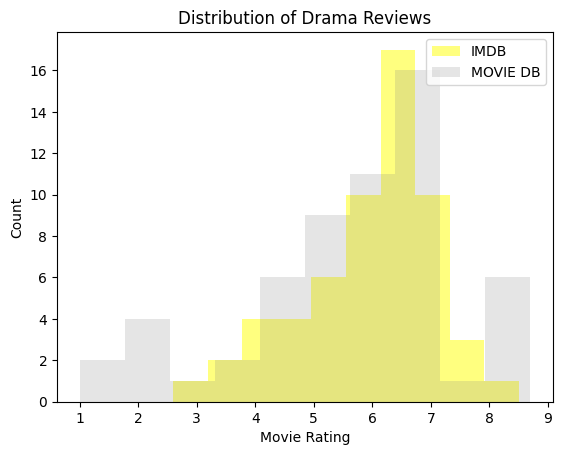

In [86]:
drama_t = table_merge[table_merge['genres']=='Drama']
plt.hist(drama_t['IMDB RATING'], alpha=.5, label='IMDB',color='yellow')
plt.hist(drama_t['MOVIE DB RATING'],alpha=.2,label='MOVIE DB',color='grey')
plt.legend(loc='upper right')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Drama Reviews')
plt.show()

IMDb users tend to rate Action films around a 6, while TMDB users tend to rate them between a 4 and 7. Similar to Comedy films, TMDB users are more likely to rate Action films towards the lower and upper extremities. 

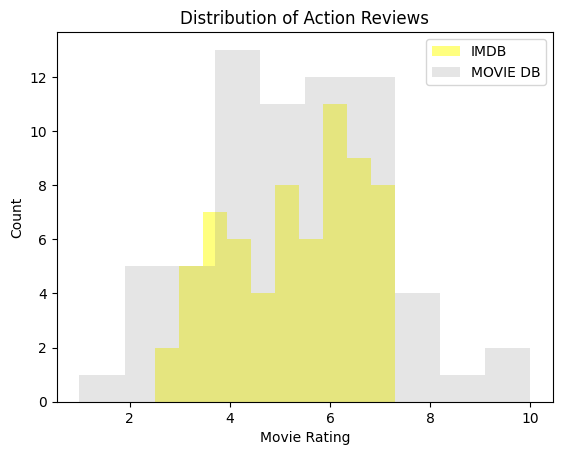

In [87]:
action_t = table_merge[table_merge['genres']=='Action']
plt.hist(action_t['IMDB RATING'], alpha=.5, label='IMDB',color='yellow')
plt.hist(action_t['MOVIE DB RATING'],alpha=.2,label='MOVIE DB',color='grey')
plt.legend(loc='upper right')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Action Reviews')
plt.show()

IMDb users tend to rate Adventure films between a 5 and 6, while TMDB users tend to rate them around a 6. This is the one genre in which IMDb users are more likely to rate Adventure movies in both the lower and upper extremities.


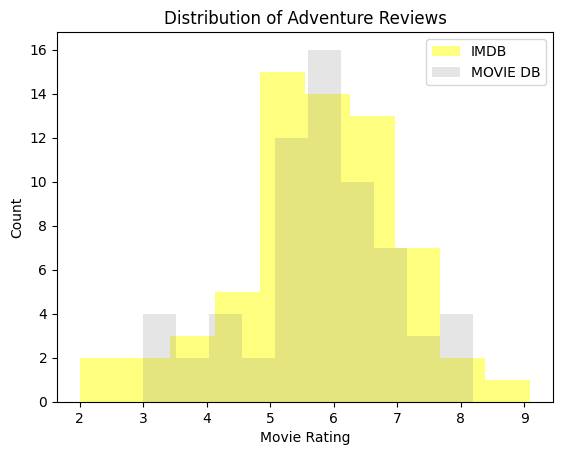

In [88]:
adven_t = table_merge[table_merge['genres']=='Adventure']
plt.hist(adven_t['IMDB RATING'], alpha=.5, label='IMDB',color='yellow')
plt.hist(adven_t['MOVIE DB RATING'],alpha=.2,label='MOVIE DB',color='grey')
plt.legend(loc='upper right')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Adventure Reviews')
plt.show()

IMDb users tend to rate Crime films between a 6 and a 7, while TMDB users tend to rate them between a 5.5 and 6. Like Comedy films, TMDB users are more likely to rate Crime films in the lower extremities while IMDb users are more likely to rate them towards the upper extremities (however, not as significantly). 

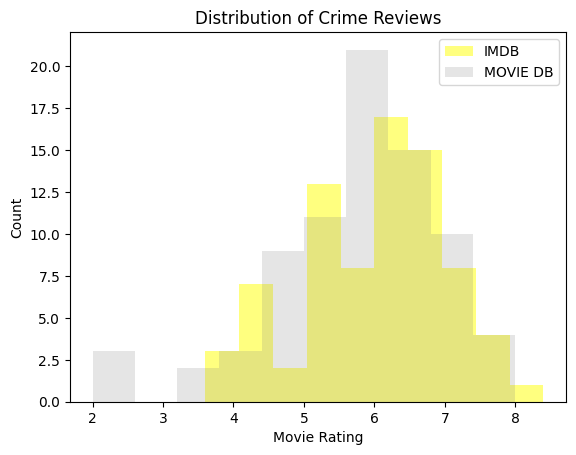

In [89]:
crime_t = table_merge[table_merge['genres']=='Crime']
plt.hist(crime_t['IMDB RATING'], alpha=.5, label='IMDB',color='yellow')
plt.hist(crime_t['MOVIE DB RATING'],alpha=.2,label='MOVIE DB',color='grey')
plt.legend(loc='upper right')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Crime Reviews')
plt.show()

#MOVIE PREDICTIONS USING MACHINE LEARNING

**PREDICTING GENRE BASED UPON PLOT SYNOPSIS**

In [90]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=88b7e5bc429211ea867fb2d771f60ada07393b960303bb2b8546b249aafd57f6
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.ml import feature,Pipeline, regression
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover,CountVectorizer, IDF, StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.sql.functions import col
spark = SparkSession.builder.getOrCreate()
import pandas as pd
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.sql.functions import when, col
from pyspark.sql.types import FloatType
from pyspark.sql import functions as fn
from pyspark.ml.classification import LogisticRegression


In [3]:
filepath = "/content/mpst_full_data.csv"
df = spark.read.csv(filepath, header=True)
df=df.select(df.columns[:3])
df

DataFrame[imdb_id: string, title: string, plot_synopsis: string]

In [6]:
movie_titles = pd.read_csv('title.basics.tsv', sep='\t', header=0, on_bad_lines='skip', low_memory=False)
movie_crew = pd.read_csv('title.crew.tsv', sep='\t', header=0)
movie_crew_names = pd.read_csv('name.basics.tsv', sep='\t', header=0)
movie_ratings = pd.read_csv('title.ratings.tsv', sep='\t', header=0)
title_and_ratings = pd.merge(movie_titles, movie_ratings)
title_ratings_crew = pd.merge(title_and_ratings, movie_crew)
title_ratings_crew_names = pd.merge(title_ratings_crew, movie_crew_names, 
                                    left_on='directors', right_on='nconst')
movies = title_ratings_crew_names[title_ratings_crew_names.titleType == "movie"]
movies = movies[movies.isAdult != 1]
movies['genres'] = movies['genres'].str.split(',').str[0]

In [7]:
smovies = spark.createDataFrame(movies)

In [8]:
joined_movies = df.join(smovies,df['imdb_id']==smovies['tconst'],'inner')

In [9]:
joined_movies.groupBy('genres').count().show()

+-----------+-----+
|     genres|count|
+-----------+-----+
|      Crime| 1193|
|    Romance|   26|
|   Thriller|   32|
|  Adventure|  763|
|      Drama| 2443|
|        War|    2|
|Documentary|   48|
|     Family|   28|
|    Fantasy|   92|
|      Adult|    1|
|    History|    4|
|    Mystery|   80|
|    Musical|   20|
|  Animation|   77|
|      Music|    3|
|  Film-Noir|   14|
|     Horror|  946|
|    Western|   90|
|  Biography|  445|
|     Comedy| 2464|
+-----------+-----+
only showing top 20 rows



In [10]:
subset_j_movies = joined_movies.filter(col('genres').isin(['Crime','Adventure','Drama','Horror','Comedy']))

In [11]:
subset_j_movies.groupBy('genres').count().show()

+---------+-----+
|   genres|count|
+---------+-----+
|    Crime| 1193|
|Adventure|  763|
|    Drama| 2443|
|   Horror|  946|
|   Comedy| 2464|
+---------+-----+



In [12]:
sample_movies = subset_j_movies.sampleBy('genres',{'Crime':.67,'Adventure':1.0,'Drama':.318,'Horror':.84,'Comedy':.33})
sample_movies.groupBy('genres').count().show()

+---------+-----+
|   genres|count|
+---------+-----+
|    Crime|  803|
|Adventure|  763|
|    Drama|  779|
|   Horror|  794|
|   Comedy|  859|
+---------+-----+



In [13]:
tokenizer = RegexTokenizer(pattern='\W+').setInputCol('plot_synopsis').setOutputCol('words')
sw_filter = StopWordsRemover()\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")
cv = CountVectorizer(minTF=1., minDF=5)\
  .setInputCol("filtered")\
  .setOutputCol("tf")\
  .setVocabSize(2000)
idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')
movies_pre_proc_pipe = Pipeline(stages=[tokenizer,sw_filter,cv,idf]).fit(sample_movies)
movies_pre_proc_df = movies_pre_proc_pipe.transform(sample_movies)
indexer=StringIndexer(inputCol='genres',outputCol='one_hot_genre')
movies_pre_proc_df=indexer.fit(movies_pre_proc_df).transform(movies_pre_proc_df)

In [14]:
p_df=movies_pre_proc_df.toPandas()

In [15]:
le=LabelEncoder()
p_df['directors_encoded']=le.fit_transform(p_df['directors'])
movies_model = spark.createDataFrame(p_df)
va = VectorAssembler(inputCols=['tfidf','directors_encoded'],outputCol='features')
va_df = va.transform(movies_model)

In [16]:
#tfidf and directors_encoded as input vars; genre as target var
train, test= va_df.randomSplit([.8,.2])
nb=NaiveBayes(labelCol='one_hot_genre', featuresCol='features')
model=nb.fit(train)
model=model.transform(test)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='one_hot_genre',metricName='accuracy')
accuracy = evaluator.evaluate(model)
print("Accuracy:", accuracy)

Accuracy: 0.3320363164721141


In [17]:
#just tfidf as input var and genre as target var
train, test= movies_pre_proc_df.randomSplit([.8,.2])
nb=NaiveBayes(labelCol='one_hot_genre', featuresCol='tfidf')
model=nb.fit(train)
model=model.transform(test)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='one_hot_genre',metricName='accuracy')
accuracy = evaluator.evaluate(model)
print("Accuracy:", accuracy)

Accuracy: 0.39846743295019155


In [18]:
df_ref = subset_j_movies.filter(col('genres').isin(['Crime','Drama','Comedy']))
df_ref = df_ref.sampleBy('genres',{'Crime':1.0,'Drama':.5,'Comedy':.5})
df_ref.groupBy('genres').count().show()

+------+-----+
|genres|count|
+------+-----+
| Crime| 1193|
| Drama| 1199|
|Comedy| 1236|
+------+-----+



In [19]:
movies_pre_proc_pipe_2 = Pipeline(stages=[tokenizer,sw_filter,cv,idf]).fit(df_ref)
movies_pre_proc_df2 = movies_pre_proc_pipe.transform(df_ref)
movies_pre_proc_df2=indexer.fit(movies_pre_proc_df2).transform(movies_pre_proc_df2)

In [20]:
train, test= movies_pre_proc_df2.randomSplit([.8,.2])
nb=NaiveBayes(labelCol='one_hot_genre', featuresCol='tfidf')
model=nb.fit(train)
model=model.transform(test)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='one_hot_genre',metricName='accuracy')
accuracy = evaluator.evaluate(model)
print("Accuracy:", accuracy)

Accuracy: 0.47643979057591623


**PREDICTING USER RATING BASED UPON USER REVIEW**

In [21]:
movies['startYear']=pd.to_numeric(movies['startYear'],errors='coerce')
movie_2k= movies.loc[(movies['startYear']>1999) & (movies['startYear']<2010)]
movie_2k = movie_2k.dropna(subset='primaryTitle')
movie_2k_sample = movie_2k.sample(n=500)
movie_title_list = movie_2k_sample['primaryTitle'].tolist()
movie_title_list = [word.lower().replace(" ", "-") for word in movie_title_list]
import requests
from bs4 import BeautifulSoup
#To save the reviews in a dataframe 
import pandas as pd

review_dict = {'title':[],'name':[], 'date':[], 'rating':[], 'review':[]}
for title_input in movie_title_list:
  for page in range(0,2): #Remember to update the number of pages 
    url = f'https://www.metacritic.com/movie/{title_input}/user-reviews?page='+str(page)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response  = requests.get(url, headers = user_agent)
    #time.sleep(rand.randint(3,30)) 
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review pad_top1'): 
        review_dict['name'].append(review.find('span', class_='author').text)
        review_dict['date'].append(review.find('span', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='left fl').text)
        review_dict['title'].append(title_input)
        if review.find('span', class_='blurb blurb_expanded'):
              review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
              review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  godfather_reviews = pd.DataFrame(review_dict) 

In [22]:
movie_reviews = godfather_reviews
movie_reviews['rating']=movie_reviews['rating'].str.replace('\n','')
movie_reviews['rating']=pd.to_numeric(movie_reviews['rating'])

In [23]:
tokenizer2 = RegexTokenizer(pattern='\W+').setInputCol('review').setOutputCol('words')
sw_filter = StopWordsRemover()\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")
cv = CountVectorizer(minTF=1., minDF=5)\
  .setInputCol("filtered")\
  .setOutputCol("tf")\
  .setVocabSize(2000)
idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')

movie_reviews_spark = spark.createDataFrame(movie_reviews)

movies_pre_proc_pipe_meta = Pipeline(stages=[tokenizer2,sw_filter,cv,idf]).fit(movie_reviews_spark)
movies_pre_proc_df_meta = movies_pre_proc_pipe_meta.transform(movie_reviews_spark)

In [24]:
movie_rate_model = movies_pre_proc_df_meta.toPandas()
bins = [-1, 3, 6, 10]
labels = ['Red', 'Yellow', 'Green']
movie_rate_model['label'] = pd.cut(movie_rate_model['rating'], bins=bins, labels=labels)
movie_rate_model = spark.createDataFrame(movie_rate_model)
si = StringIndexer(inputCol='label',outputCol='e_label')
movie_rate_model=si.fit(movie_rate_model).transform(movie_rate_model)

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

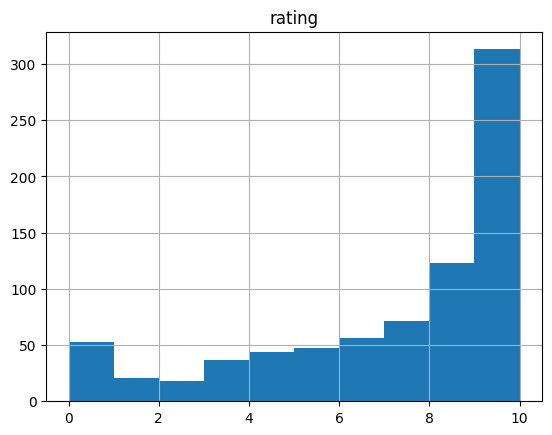

In [25]:
movie_rate_model.toPandas().hist('rating') #target var skewed; need to balance

array([[<Axes: title={'center': 'e_label'}>]], dtype=object)

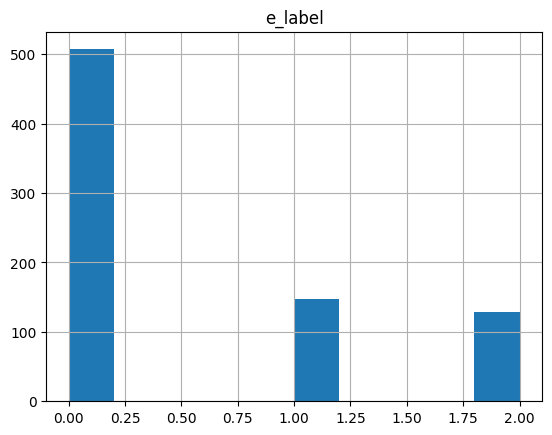

In [26]:
movie_rate_model.toPandas().hist('e_label')

In [27]:
movie_yellow = movie_rate_model.filter(col('e_label')==1)
movie_red=  movie_rate_model.filter(col('e_label')==2)
movie_rate_model = movie_rate_model.union(movie_yellow)
movie_rate_model = movie_rate_model.union(movie_red)

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

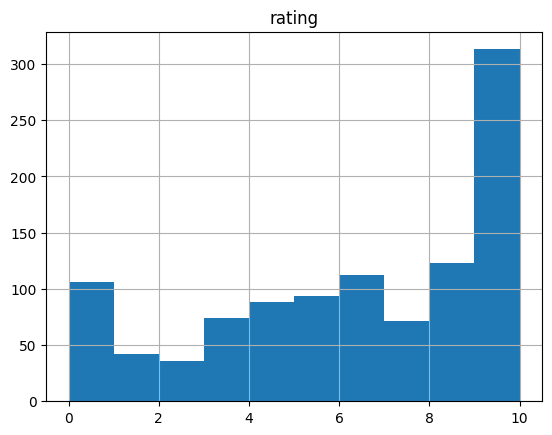

In [28]:
movie_rate_model.toPandas().hist('rating')

array([[<Axes: title={'center': 'e_label'}>]], dtype=object)

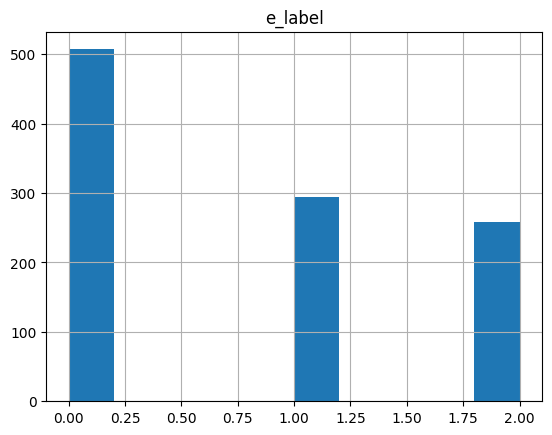

In [29]:
movie_rate_model.toPandas().hist('e_label')

In [30]:
train_m, test_m = movie_rate_model.randomSplit([.8,.2])

In [31]:
#predicitng rating (0-10) based on tfidf of review
rfr= RandomForestRegressor(labelCol='rating',featuresCol='tfidf')
rf_model = rfr.fit(train_m)
predictions = rf_model.transform(test_m)
evaluator = RegressionEvaluator(labelCol='rating', predictionCol='prediction', metricName='mae')
evaluator.evaluate(predictions)

2.5461862411845773

In [32]:
movie_rate_model.show()

+----------+--------------+------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+------+-------+
|     title|          name|        date|rating|              review|               words|            filtered|                  tf|               tfidf| label|e_label|
+----------+--------------+------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+------+-------+
|   bandits|          Mike|Mar 26, 2006|     7| Very intresting ...|[very, intresting...|[intresting, movi...|(1383,[1,99,168,2...|(1383,[1,99,168,2...| Green|    0.0|
|   bandits|  Habibiehakim|May 29, 2022|     1|Bandits is the wo...|[bandits, is, the...|[bandits, worst, ...|(1383,[1,3,4,5,6,...|(1383,[1,3,4,5,6,...|   Red|    2.0|
|   bandits|         3mta3|Feb  9, 2022|    10|Great movie with ...|[great, movie, wi...|[great, movie, to...|(1383,[1,3,6,17,1...|(1383,[1,3,6,17,1...| Green| 

In [ ]:
#predicing if bad, medium, or good movie based on tfidf of reviewr
nn=MultilayerPerceptronClassifier(featuresCol='tfidf',labelCol='e_label',layers=[2000,3]) 
pipe=nn.fit(train_m)
preds=pipe.transform(test_m)
evaluator = MulticlassClassificationEvaluator(labelCol = 'e_label', predictionCol = 'prediction', metricName = 'accuracy')
evaluator.evaluate(preds)

In [35]:
sentiment_df = movie_rate_model.withColumn('sentiment',when(col('rating')<5,0).otherwise(1))

In [36]:
neg_pct=sentiment_df[sentiment_df['sentiment']=='0'].count()/sentiment_df.count()*100
print(f'% of negative reviews in data frame:  {neg_pct}%')
pos_pct=sentiment_df[sentiment_df['sentiment']=='1'].count()/sentiment_df.count()*100
print(f'% of positive reviews in data frame:  {pos_pct}%')

% of negative reviews in data frame:  32.67233238904627%
% of positive reviews in data frame:  67.32766761095374%


In [37]:
sentiment_df =sentiment_df.withColumn('sentiment', sentiment_df['sentiment'].cast(FloatType()))

In [38]:
train_s, test_s = sentiment_df.randomSplit([.8,.2])

In [39]:
lr =LogisticRegression(labelCol='sentiment',featuresCol='tfidf')
lr_model = lr.fit(train_s)
lr_model.transform(test_s).\
    select(fn.expr('float(prediction = sentiment)').alias('correct')).\
    select(fn.avg('correct')).show()

+------------------+
|      avg(correct)|
+------------------+
|0.9158415841584159|
+------------------+



# Metacritic Web Scraping

### **Import Libraries for Web Scraping**

In [17]:
#To get the url, and scrap the html page  
import requests
from bs4 import BeautifulSoup
#To save the reviews in a dataframe 
import pandas as pd

### **Create Dataframe of Top Ten Metacritic Movies from 2000-2009 via Web Scraping**

In [18]:
review_dict = {'title':[],'name':[], 'date':[], 'rating':[], 'review':[]}

In [19]:
for page in range(0,16): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-dark-knight/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Dark Knight')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten1 = pd.DataFrame(review_dict) 

In [20]:
for page in range(0,4): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-lord-of-the-rings-the-return-of-the-king/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Lord of the Rings The Return of the King')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten2 = pd.DataFrame(review_dict) 

In [21]:
for page in range(0,3): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-lord-of-the-rings-the-fellowship-of-the-ring/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Lord of the Rings The Fellowship of the Ring')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten3 = pd.DataFrame(review_dict) 

In [22]:
for page in range(0,1): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-pianist/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Pianist')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten4 = pd.DataFrame(review_dict) 

In [23]:
for page in range(0,2): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/gladiator/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('Gladiator')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten5 = pd.DataFrame(review_dict) 

In [24]:
for page in range(0,7): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/wall-e/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('Wall-E')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten6 = pd.DataFrame(review_dict) 

In [25]:
for page in range(0,2): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-lord-of-the-rings-the-two-towers/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Lord of the Rings The Two Towers')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten7 = pd.DataFrame(review_dict) 

In [26]:
for page in range(0,3): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/spirited-away/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('Spirited Away')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten8 = pd.DataFrame(review_dict) 

In [27]:
for page in range(0,5): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-departed/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Departed')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten9 = pd.DataFrame(review_dict) 

In [28]:
for page in range(0,3): #Remember to update the number of pages 
  url = 'https://www.metacritic.com/movie/the-prestige/user-reviews?page='+str(page)
  user_agent = {'User-agent': 'Mozilla/5.0'}
  response  = requests.get(url, headers = user_agent)
  #time.sleep(rand.randint(3,30)) 
  soup = BeautifulSoup(response.text, 'html.parser')
  for review in soup.find_all('div', class_='review pad_top1'): 
      review_dict['name'].append(review.find('span', class_='author').text)
      review_dict['date'].append(review.find('span', class_='date').text)
      review_dict['rating'].append(review.find('div', class_='left fl').text)
      review_dict['title'].append('The Prestige')
      if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
      else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

  top_ten10 = pd.DataFrame(review_dict) 

In [29]:
frames = [top_ten1, top_ten2,top_ten3,top_ten4,top_ten5,top_ten6,top_ten7,top_ten8,top_ten9,top_ten10]
  
metacritic_top_ten = pd.concat(frames)

### **Create Dataframe of IMDb Top Ten Movies from 2000-2009**

In [30]:
metacritic_top_ten['rating'] = metacritic_top_ten['rating'].str.replace('\n','')
metacritic_top_ten['rating'] = metacritic_top_ten['rating'].astype(str).astype(int)
metacritic_top_ten = metacritic_top_ten.groupby('title').mean()
metacritic_top_ten = metacritic_top_ten.sort_values(by=['rating'],ascending=False)

<ipython-input-30-e889d17dc102>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metacritic_top_ten = metacritic_top_ten.groupby('title').mean()


In [31]:
movies_decade2 = two_decade[two_decade.numVotes >= 50000]
imdb_top_ten = movies_decade2.sort_values(by=['averageRating'],ascending=False).head(10)
imdb_top_ten = imdb_top_ten.drop(columns=['tconst','titleType','originalTitle','year','runtimeMinutes','genres','numVotes','directors','writers','nconst','primaryName','birthYear','deathYear','primaryProfession','knownForTitles'])

### **Compare IMDb and Metacritic Dataframe to Eachother**

In [32]:
display(imdb_top_ten)
display(metacritic_top_ten)

,primaryTitle,averageRating
201963,The Lord of the Rings: The Return of the King,9.0
317291,The Dark Knight,9.0
201962,The Lord of the Rings: The Fellowship of the Ring,8.8
201964,The Lord of the Rings: The Two Towers,8.8
160639,Spirited Away,8.6
77525,The Departed,8.5
63528,The Pianist,8.5
317292,The Prestige,8.5
148628,Gladiator,8.5
206483,WALL·E,8.4


,rating
title,
Spirited Away,9.243333
The Lord of the Rings The Two Towers,9.233503
The Lord of the Rings The Fellowship of the Ring,9.199262
The Lord of the Rings The Return of the King,9.112782
The Pianist,9.034483
The Dark Knight,8.771486
Gladiator,8.531250
Wall-E,8.403624
The Prestige,8.325991
